## Implement the Continuous Bag of Words (CBOW) Model. Stages can be:
a. Data preparation<br>
b. Generate training data<br>
c. Train model<br>
d. Output<br>

In [1]:
# a. Data Preparation

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 
import seaborn as sns


# Data read
data = open("CBOW.txt","r").read()

sentences = data.lower().split('.')

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

vocab_size = len(tokenizer.word_index) + 1
word_to_index = tokenizer.word_index
index_to_word = {v:k for k,v in word_to_index.items()}

print(index_to_word)
print(word_to_index)


{1: 'the', 2: 'of', 3: 'influenza', 4: 'covid', 5: '19', 6: 'virus', 7: 'for', 8: 'transmission', 9: 'is', 10: 'to', 11: 'a', 12: 'and', 13: 'between', 14: 'time', 15: 'serial', 16: 'interval', 17: 'than', 18: 'be', 19: '5', 20: 'days', 21: 'â€“', 22: 'are', 23: 'viruses', 24: 'shorter', 25: 'from', 26: 'appearance', 27: 'symptoms', 28: 'while', 29: '3', 30: 'this', 31: 'that', 32: 'can', 33: 'in', 34: 'major', 35: 'driver', 36: 'number', 37: '2', 38: 'speed', 39: 'an', 40: 'important', 41: 'point', 42: 'difference', 43: 'two', 44: 'has', 45: 'median', 46: 'incubation', 47: 'period', 48: 'infection', 49: 'successive', 50: 'cases', 51: 'estimated', 52: '6', 53: 'means', 54: 'spread', 55: 'faster', 56: 'further', 57: 'first', 58: 'illness', 59: 'or', 60: 'potentially', 61: 'pre', 62: 'symptomatic', 63: 'â€“transmission', 64: 'before', 65: 'contrast', 66: 'we', 67: 'learning', 68: 'there', 69: 'people', 70: 'who', 71: 'shed', 72: '24', 73: '48', 74: 'hours', 75: 'prior', 76: 'symptom', 77

In [14]:
# b. Generate Training Data

vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2       # CBOW window

contexts = []
targets = []

for seq in sequences:
    for i in range(context_size, len(seq)-context_size):
        contexts.append([seq[i-2], seq[i-1], seq[i+1], seq[i+2]])
        targets.append(seq[i])

print(contexts, "\n")
print(targets)

# print few example pairs
for i in range(50):
    print([index_to_word[j] for j in contexts[i]], "->", index_to_word[targets[i]])

X = np.array(contexts)
Y = np.array(targets)


[[1, 38, 8, 9], [38, 2, 9, 39], [2, 8, 39, 40], [8, 9, 40, 41], [9, 39, 41, 2], [39, 40, 2, 42], [40, 41, 42, 13], [41, 2, 13, 1], [2, 42, 1, 43], [42, 13, 43, 23], [3, 44, 24, 45], [44, 11, 45, 46], [11, 24, 46, 47], [24, 45, 47, 1], [45, 46, 1, 14], [46, 47, 14, 25], [47, 1, 25, 48], [1, 14, 48, 10], [14, 25, 10, 26], [25, 48, 26, 2], [48, 10, 2, 27], [10, 26, 27, 12], [26, 2, 12, 11], [2, 27, 11, 24], [27, 12, 24, 15], [12, 11, 15, 16], [11, 24, 16, 1], [24, 15, 1, 14], [15, 16, 14, 13], [16, 1, 13, 49], [1, 14, 49, 50], [14, 13, 50, 17], [13, 49, 17, 4], [49, 50, 4, 5], [50, 17, 5, 6], [1, 15, 7, 4], [15, 16, 4, 5], [16, 7, 5, 6], [7, 4, 6, 9], [4, 5, 9, 51], [5, 6, 51, 10], [6, 9, 10, 18], [9, 51, 18, 19], [51, 10, 19, 52], [10, 18, 52, 20], [18, 19, 20, 28], [19, 52, 28, 7], [52, 20, 7, 3], [20, 28, 3, 6], [28, 7, 6, 1], [7, 3, 1, 15], [3, 6, 15, 16], [6, 1, 16, 9], [1, 15, 9, 29], [15, 16, 29, 20], [30, 53, 3, 32], [53, 31, 32, 54], [31, 3, 54, 55], [3, 32, 55, 17], [32, 54, 17,

In [21]:
# c. Train CBOW Model

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, epochs=80)


Epoch 1/80


C:\Users\SHUBHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0185 - loss: 4.6341      
Epoch 2/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0741 - loss: 4.6225 
Epoch 3/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0556 - loss: 4.6061 
Epoch 4/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0494 - loss: 4.5769 
Epoch 5/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0494 - loss: 4.5308 
Epoch 6/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0494 - loss: 4.4509     
Epoch 7/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0494 - loss: 4.3489 
Epoch 8/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0494 - loss: 4.2631 
Epoch 9/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0617 - loss: 4.2325 
Epoch 10/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0741 - loss: 4.1992 
Epoch 11/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0556 - loss: 4.1522 
Epoch 12/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0494 - loss: 4.1109 
Epo

In [22]:
# d. Output — embedding visualization + prediction


print(data)

# Test model
test_sentence = "interval for 19 virus"
x_test = np.array([[word_to_index.get(w) for w in test_sentence.split()]])
pred = np.argmax(model.predict(x_test))
print("Predicted Word:", index_to_word[pred])


The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. 

Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission â€“transmission of the virus before the appearance of symptoms â€“ is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. 

The reproductive number â€“ the number of secondary infections generated from one infected individual â€“ is understood to be be

<Axes: >

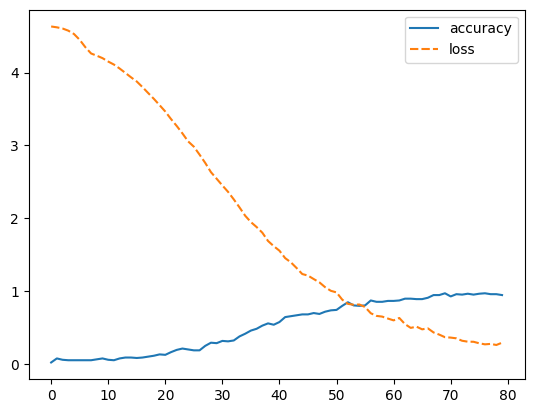

In [23]:
import seaborn as sns
sns.lineplot(model.history.history)